<a href="https://colab.research.google.com/github/dSudario9/Modelos-Nao-Supervisionadas-Diversos./blob/main/Assignment19_Clustering_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

EDA

In [107]:
df = pd.read_csv("/content/CC GENERAL.csv

In [108]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Limpeza dos dados

In [109]:
	#Excluindo variáveis não úteis
#df= df.drop(columns=["CUST_ID"])

df.drop(columns = ['CUST_ID'], inplace = True)

In [110]:
print('Qtd Linhas e Colunas ',df.shape)

Qtd Linhas e Colunas  (8950, 17)


In [111]:
# Pesquisando se existem valores Nulos 
print(df.isna().sum()) 

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [115]:
# Preenchendo dados NaN com Minimo na coluna  'MINIMUN_PAYMENTS'
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min())

In [116]:
print(df.isna().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [118]:
df.describe(percentiles=[.01,.10,.25,.50,.75,.95,.99])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.952864,1733.143852,833.984123,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.915681,2895.063757,2335.989679,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
1%,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.019163,0.000000,6.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,179.617069,85.405531,0.000000,10.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
95%,5909.111808,1.000000,3998.619500,2671.094000,1750.087500,4647.169122,1.000000,1.000000,1.000000,0.583333,15.000000,57.000000,12000.000000,6082.090595,2719.566935,1.000000,12.000000


Removendo outliers (>95%) das colunas: BALANCE,PURCHASES,MINIMUM_PAYMENTS,PAYMENTS,CREDIT_LIMIT, PURCHASES_TRX,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX

In [122]:
df = df[df.BALANCE < df.BALANCE.quantile(.95)]
df = df[df.PURCHASES < df.PURCHASES.quantile(.95)]
df = df[df.MINIMUM_PAYMENTS < df.MINIMUM_PAYMENTS.quantile(.95)]
df = df[df.PAYMENTS < df.PAYMENTS.quantile(.95)]
df = df[df.CREDIT_LIMIT < df.CREDIT_LIMIT.quantile(.95)]
df = df[df.PURCHASES_TRX < df.PURCHASES_TRX.quantile(.95)]
df = df[df.ONEOFF_PURCHASES < df.ONEOFF_PURCHASES.quantile(.95)]
df = df[df.CASH_ADVANCE < df.CASH_ADVANCE.quantile(.95)]
df = df[df.CASH_ADVANCE_TRX < df.CASH_ADVANCE_TRX.quantile(.95)]

In [123]:
df.shape

(5550, 17)

In [125]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,832.486080,0.841700,432.484301,188.472960,244.347683,363.703221,0.449513,0.127538,0.339292,0.081100,1.340721,7.907027,3029.292538,784.546855,348.946341,0.155732,11.448468
std,1027.513373,0.265193,516.419191,319.834004,396.293021,658.720724,0.385939,0.225164,0.381710,0.125014,2.144479,8.390110,2082.776936,745.763625,355.879921,0.292852,1.435887
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,53.400142,0.756945,32.622500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,284.394602,134.213938,0.000000,12.000000
50%,412.841853,1.000000,259.300000,0.000000,70.685000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,552.815653,198.379064,0.000000,12.000000
75%,1268.013678,1.000000,633.830000,250.000000,343.947500,436.852575,0.833333,0.166667,0.666667,0.142857,2.000000,12.000000,4000.000000,1033.232117,454.651688,0.166667,12.000000
max,5901.592192,1.000000,3654.080000,1370.000000,3362.670000,3058.096526,1.000000,1.000000,1.000000,0.900000,9.000000,38.000000,9100.000000,4256.495061,1919.690041,1.000000,12.000000


Normalizando os valores do Dataset

In [126]:
values = Normalizer().fit_transform(df.values)

***EDA***

In [128]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

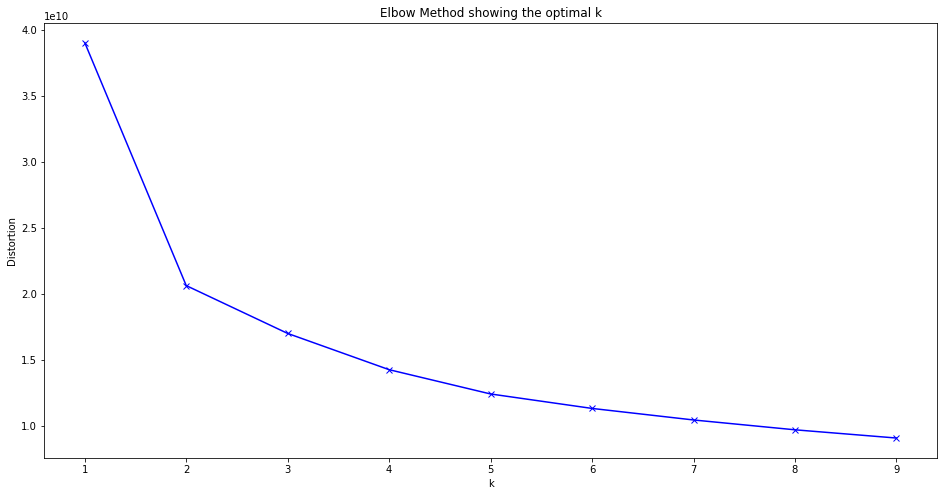

In [129]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing the optimal k')
plt.show()

In [131]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

Clusterização  Usando os  Metodo  KMeans e DBSCAN

In [132]:
#KMeans
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels_km = kmeans.labels_
print('qtd of clustrs of k-means is: ',len(set(labels_km)))


# DBSCAN
#separar clusters de alta densidade de clusters de baixa densidade.

dbscan = DBSCAN(eps=1.31, min_samples=15, metric ='manhattan').fit(values)
labels_db = dbscan.labels_
print('qtd of clustrs of dbscan is: ',len(set(labels_db)))



qtd of clustrs of k-means is:  5
qtd of clustrs of dbscan is:  1
